C:\Users\joker\AppData\Local\Temp\ipykernel_33936\3132662671.py:11: RuntimeWarning: overflow encountered in scalar multiply
  dA_X_dt = birth_rate * (A_X + A_Y) * (1 - (A_X + A_Y) / K_A )  + A_X * alpha_AB * B + beta_AC * A_X  * C  - death_rate_A * A_X
C:\Users\joker\AppData\Local\Temp\ipykernel_33936\3132662671.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dA_Y_dt = birth_rate * (A_X + A_Y) * (1 - (A_X + A_Y) / K_A )  + A_Y * alpha_AB * B + beta_AC * A_Y  * C  - death_rate_A * A_Y


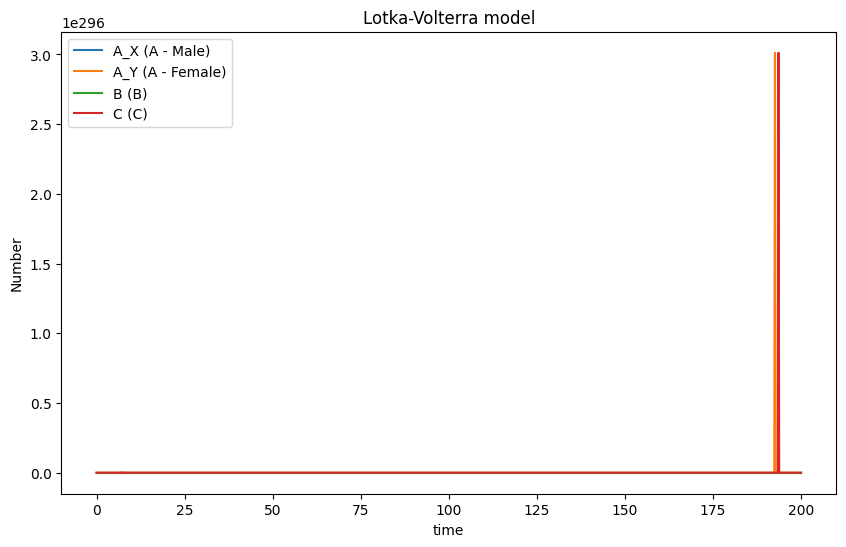

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 修改后的 Lotka-Volterra 模型的微分方程
def modified_predator_prey_model(y, t, r_B, r_C, alpha_AB, beta_AC, beta_BC, gamma_CA, gamma_CB, gamma_BA,  delta_A, K_A, K_B, K_C):
    A_X, A_Y, B, C = y
    A_diff = A_X / A_Y  # 计算雄性和雌性数量的差距
    birth_rate = delta_A * (3 - A_diff)# 出生率与雄性和雌性数量差距有关

    dA_X_dt = birth_rate * (A_X + A_Y) * (1 - (A_X + A_Y) / K_A )  + A_X * alpha_AB * B + beta_AC * A_X  * C  - death_rate_A * A_X
    dA_Y_dt = birth_rate * (A_X + A_Y) * (1 - (A_X + A_Y) / K_A )  + A_Y * alpha_AB * B + beta_AC * A_Y  * C  - death_rate_A * A_Y
    dB_dt = r_B * B * (1 - B / K_B) + beta_BC * B * C - B * gamma_BA
    dC_dt = r_C * C * (1 - C / K_C) - gamma_CA * C * (A_X + A_Y) - gamma_CB * C * B
    return [dA_X_dt, dA_Y_dt, dB_dt, dC_dt]

# 模型参数
r_B = 0.1  # 物种 B 的内增长率
r_C = 0.2  # 物种 C 的内增长率（微生物假设较强）
alpha_AB = 0.02  # 物种 A 对 B 的捕食率
beta_AC = 0.01  # 物种 A 对 C 的捕食率
beta_BC = 0.015  # 物种 B 对 C 的捕食率
gamma_CA = 0.005 # C被 A捕食
gamma_CB = 0.005 # C被 B捕食
gamma_BA = 0.001 # B被 A捕食
delta_A = 0.02  # 雄性和雌性数量差距对出生率的影响
death_rate_A = 0.01
K_A = 150  # 物种 A 的环境容纳量
K_B = 150  # 物种 B 的环境容纳量
K_C = 700  # 物种 C 的环境容纳量

# 初始条件
initial_conditions = [80, 20, 100, 500]  # 初始数量 [A_X, A_Y, B, C]

# 时间点
time_points = np.linspace(0, 200, 1000)

# 求解微分方程
solution = odeint(modified_predator_prey_model, initial_conditions, time_points, args=(r_B, r_C, alpha_AB, beta_AC, beta_BC, gamma_CA, gamma_CB, gamma_BA , delta_A, K_A, K_B, K_C))

# 绘制模型结果
plt.figure(figsize=(10, 6))
plt.plot(time_points, solution[:, 0], label='A_X (A - Male)')
plt.plot(time_points, solution[:, 1], label='A_Y (A - Female)')
plt.plot(time_points, solution[:, 2], label='B (B)')
plt.plot(time_points, solution[:, 3], label='C (C)')
plt.title('Lotka-Volterra model')
plt.xlabel('time')
plt.ylabel('Number')
plt.legend()
plt.show()


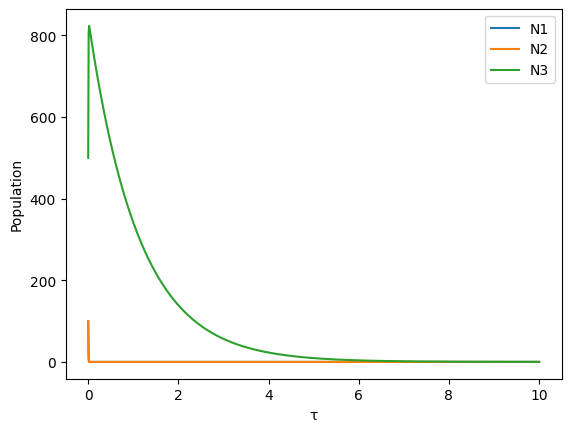

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义方程组
def model(N, τ):
    N1, N2, N3 = N
    dN1dτ = N1 * (B - a11 * N1 - a12 * N2 - a13 * N3)
    dN2dτ = N2 * (-D1 + a21 * N1 - a23 * N3)
    dN3dτ = N3 * (-D2 + a31 * N1 + a32 * N2)
    return [dN1dτ, dN2dτ, dN3dτ]

# 初始条件
N0 = [100, 100, 500]

# 定义参数
B = 1.0
a11, a12, a13 = 0.1, 0.2, 0.3
a21, a23 = 0.4, 0.5
a31, a32 = 0.6, 0.7
D1, D2 = 0.8, 0.9

# 定义时间范围
τ_values = np.linspace(0, 10, 1000)

# 求解方程组
result = odeint(model, N0, τ_values)

# 提取结果
N1_values, N2_values, N3_values = result.T

# 绘制图形
plt.plot(τ_values, N1_values, label='N1')
plt.plot(τ_values, N2_values, label='N2')
plt.plot(τ_values, N3_values, label='N3')
plt.xlabel('τ')
plt.ylabel('Population')
plt.legend()
plt.show()
